# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generator could be repaired before failing/breaking to reduce the maintenance cost. The different costs associated with maintenance are as follows:

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Importing dataset

In [ ]:
# mounting google drive for loading the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Data

In [ ]:
# Loading the training dataset 
path_train="/content/drive/MyDrive/ReneWind/Train.csv"
wind_train= pd.read_csv(path_train)

# Loading the testing dataset
path_test="/content/drive/MyDrive/ReneWind/Test.csv"
wind_test= pd.read_csv(path_test)

In [ ]:
# Copying the training dataset
df= wind_train.copy()

# Copying the testing dataset
df_test=wind_test.copy()

## Data Overview

In [ ]:
# Shape of the data
df.shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset')

There are 40000 rows and 41 columns in the dataset


In [ ]:
# Checking columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

#### Observations:
- There are 41 columns.
- 40 of them are float type.
- Target columns is integer type.


In [ ]:
# Let us look at first 5 rows of data
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,-2.910,-2.569,4.109,1.317,-1.621,-3.827,-1.617,0.669,0.387,0.854,-6.353,4.272,3.162,0.258,-3.547,-4.285,2.897,1.508,3.668,7.124,-4.096,1.015,-0.970,-0.968,2.064,-1.646,0.427,0.735,-4.470,-2.772,-2.505,-3.783,-6.823,4.909,0.482,5.338,2.381,-3.128,3.527,-3.020,0
2,4.284,5.105,6.092,2.640,-1.041,1.308,-1.876,-9.582,3.470,0.763,-2.573,-3.350,-0.595,-5.247,-4.310,-16.232,-1.000,2.318,5.942,-3.858,-11.599,4.021,-6.281,4.633,0.930,6.280,0.851,0.269,-2.206,-1.329,-2.399,-3.098,2.690,-1.643,7.566,-3.198,-3.496,8.105,0.562,-4.227,0
3,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
4,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0


In [ ]:
# Let us look at last 5 rows
df.tail(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
39995,-3.897,-3.942,-0.351,-2.417,1.108,-1.528,-3.520,2.055,-0.234,-0.358,-3.782,2.180,6.112,1.985,-8.330,-1.639,-0.915,5.672,-3.924,2.133,-4.502,2.777,5.728,1.620,-1.700,-0.042,-2.923,-2.760,-2.254,2.552,0.982,7.112,1.476,-3.954,1.856,5.029,2.083,-6.409,1.477,-0.874,0
39996,-3.187,-10.052,5.696,-4.370,-5.355,-1.873,-3.947,0.679,-2.389,5.457,1.583,3.571,9.227,2.554,-7.039,-0.994,-9.665,1.155,3.877,3.524,-7.015,-0.132,-3.446,-4.801,-0.876,-3.812,5.422,-3.732,0.609,5.256,1.915,0.403,3.164,3.752,8.530,8.451,0.204,-7.130,4.249,-6.112,0
39997,-2.687,1.961,6.137,2.600,2.657,-4.291,-2.344,0.974,-1.027,0.497,-9.589,3.177,1.055,-1.416,-4.669,-5.405,3.720,2.893,2.329,1.458,-6.429,1.818,0.806,7.786,0.331,5.257,-4.867,-0.819,-5.667,-2.861,4.674,6.621,-1.989,-1.349,3.952,5.450,-0.455,-2.202,1.678,-1.974,0
39998,0.521,0.096,8.457,2.138,-1.636,-2.713,-2.693,-3.410,1.936,2.012,-4.989,-0.819,4.166,-1.192,-5.033,-8.523,-1.950,0.017,4.505,2.031,-8.849,0.566,-6.040,-0.043,1.656,4.250,1.727,-1.686,-3.963,-2.642,1.939,-1.257,-1.136,1.434,5.905,3.752,-1.867,-1.918,2.573,-5.019,0
39999,2.403,-1.336,6.451,-5.356,-0.434,0.255,-1.120,-2.523,-0.654,2.316,-2.862,0.199,1.593,-0.337,-0.709,-4.408,-3.683,2.973,-1.223,-1.958,-4.454,0.464,-4.952,-1.624,2.965,2.009,5.712,-2.910,-2.287,-3.676,5.678,-4.310,-0.709,-1.359,1.639,7.766,-0.245,-1.124,2.872,1.902,0


In [ ]:
# Let's look at some random sample data
df.sample(n=10, random_state=1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
3841,-1.761,1.726,3.116,-0.722,1.637,-0.666,-1.947,0.341,-0.434,-1.861,-0.749,1.484,3.233,-1.749,-5.028,-1.381,-1.400,2.133,-1.506,-2.451,-4.512,0.036,0.488,2.010,-2.194,5.601,-4.420,-3.459,1.849,3.183,3.132,4.559,5.340,-4.860,3.972,1.084,-0.287,-2.124,0.088,0.467,0
12898,-0.320,-3.223,6.945,-6.074,0.561,-1.151,-1.368,-0.204,-3.530,5.112,-3.729,2.433,3.220,1.317,-1.652,-0.902,-6.406,2.609,-0.584,-3.180,-3.683,-0.108,-3.112,1.133,1.378,2.400,5.679,-3.810,-4.107,-3.610,9.926,2.087,0.300,-0.581,2.850,11.783,-1.036,-2.657,4.049,-0.044,0
15032,3.660,-0.500,1.673,-0.760,-3.447,-0.177,-0.151,-0.962,0.798,-0.378,2.456,1.879,2.194,-1.375,-1.304,-3.646,-1.917,-0.565,3.382,-0.035,-5.565,2.033,-0.868,-1.966,0.320,-0.502,2.028,-0.769,1.731,3.023,-2.706,-3.397,0.712,0.350,5.073,-2.272,-0.377,-0.116,-0.630,-1.382,0
36781,-2.031,-7.076,1.610,-2.808,-2.627,-3.162,-2.402,2.357,-1.255,2.680,-4.866,5.473,5.340,2.597,-5.179,-2.976,-0.569,3.979,1.725,6.054,-5.327,3.561,3.365,-0.392,1.284,-5.200,2.721,-0.473,-4.739,0.070,-1.208,0.449,-5.095,2.979,2.545,7.661,2.722,-5.889,3.234,-2.896,0
9201,-1.167,4.636,-1.012,0.317,3.276,-0.310,1.389,4.652,-4.849,-2.074,3.232,5.033,-2.635,-2.825,1.290,6.432,0.251,-1.082,0.626,-7.338,0.912,-0.579,5.034,8.327,-4.864,5.333,-8.193,-1.594,5.292,6.554,5.234,10.877,8.250,-5.160,4.674,-3.517,-1.730,1.969,-3.425,2.554,0
21288,-3.187,3.811,0.850,1.188,3.332,-1.400,-1.550,0.635,-0.389,-2.849,-3.003,3.367,2.551,-2.366,-6.294,-2.694,1.701,3.319,-0.941,-2.522,-4.691,1.916,4.573,6.015,-3.253,6.472,-7.581,-2.034,-0.284,2.482,0.879,7.500,3.779,-5.057,2.755,-0.313,0.304,0.109,-0.081,-0.264,0
37321,5.670,1.844,7.218,1.555,-3.158,-2.388,-0.937,-2.299,3.368,-0.475,-1.594,-0.763,4.475,-1.536,-2.689,-7.051,-1.965,-2.414,3.769,0.894,-9.227,1.081,-4.955,-3.370,2.380,4.443,3.109,-2.406,-1.815,-1.632,0.736,-4.128,-1.698,-0.145,6.159,-0.502,-2.076,-3.097,0.030,-2.895,0
8600,-2.460,-2.394,3.226,0.063,-0.580,-2.797,-0.635,2.119,-2.977,2.924,-3.355,4.535,0.791,0.388,-0.781,0.137,-0.147,0.194,4.076,1.940,-1.894,0.263,-0.027,3.036,0.127,-0.972,0.182,0.250,-2.563,-0.479,2.430,2.392,-2.040,3.391,2.891,5.109,0.085,-1.349,2.057,-2.480,0
33089,1.001,0.984,-2.561,3.375,2.495,-0.721,0.068,3.662,0.327,-1.763,-3.400,-4.089,-5.766,1.293,4.039,3.405,6.861,-0.479,-3.237,2.401,4.419,-0.394,2.743,4.115,1.275,-1.566,-4.673,2.077,-0.693,-1.068,2.815,5.784,-1.469,-2.905,-2.098,-2.401,-0.437,-3.385,-3.897,3.312,1
39511,-3.649,-1.589,-0.575,0.649,1.330,-2.730,-2.246,2.807,-0.600,-1.071,-5.599,4.039,2.624,0.527,-5.739,-2.257,3.684,4.408,-0.597,3.525,-3.745,3.215,6.282,4.595,-1.080,-0.413,-5.066,-0.157,-3.058,1.399,-1.027,6.162,-1.610,-1.636,1.450,2.772,2.196,-3.788,0.694,-1.008,0


#### Observations:
- From the above sample we do not see any missing values. Let us investigate it further.
- Target column looks like to have 2 classes 0 and 1.
- All of the columns except Target , have both positive and negative values.


In [ ]:
# Checking for missing values in training data
df.isnull().any()

V1         True
V2         True
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
V29       False
V30       False
V31       False
V32       False
V33       False
V34       False
V35       False
V36       False
V37       False
V38       False
V39       False
V40       False
Target    False
dtype: bool

#### Observations:
- V1 and V2 columns have missing values in training data.

In [ ]:
# Checking for missing values in testing data
df_test.isnull().any()

V1         True
V2         True
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
V29       False
V30       False
V31       False
V32       False
V33       False
V34       False
V35       False
V36       False
V37       False
V38       False
V39       False
V40       False
Target    False
dtype: bool

#### Observations:
- V1 and V2 columns have missing values in testing data.

In [ ]:
# checking duplicate values in the data
df.duplicated().value_counts()

False    40000
dtype: int64

#### Observations:
- No duplicated rows.

In [ ]:
# checking how many rows are having missing values in V1
df[df['V1'].isnull()==True].shape[0]

46

There are 46 missing rows in 'V1' column

In [ ]:
# checking how many rows are having missing values V2
df[df['V2'].isnull()==True].shape[0]

39

There are 39 missing rows in 'V2' column

## EDA

In [ ]:
# summary of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,39954.000,-0.288,3.449,-13.502,-2.751,-0.774,1.837,17.437
V2,39961.000,0.443,3.139,-13.212,-1.638,0.464,2.538,13.089
V3,40000.000,2.506,3.406,-11.469,0.203,2.265,4.585,18.366
V4,40000.000,-0.066,3.437,-16.015,-2.350,-0.124,2.149,13.280
V5,40000.000,-0.045,2.107,-8.613,-1.507,-0.097,1.346,9.403
V6,40000.000,-1.001,2.037,-10.227,-2.363,-1.007,0.374,7.065
V7,40000.000,-0.893,1.757,-8.206,-2.037,-0.935,0.207,8.006
V8,40000.000,-0.563,3.299,-15.658,-2.660,-0.384,1.714,11.679
V9,40000.000,-0.008,2.162,-8.596,-1.494,-0.052,1.426,8.507
V10,40000.000,-0.002,2.183,-11.001,-1.391,0.106,1.486,8.108


#### Observations:
- V1 and V2 column have missing values.
- As given in the data description, "1” in the target variable ,considered as “failure” and “0” will represent “No failure”. It looks like most of the rows in target column belongs to class "0" i.e no failure.

### Plotting histograms and boxplots for all the variables

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

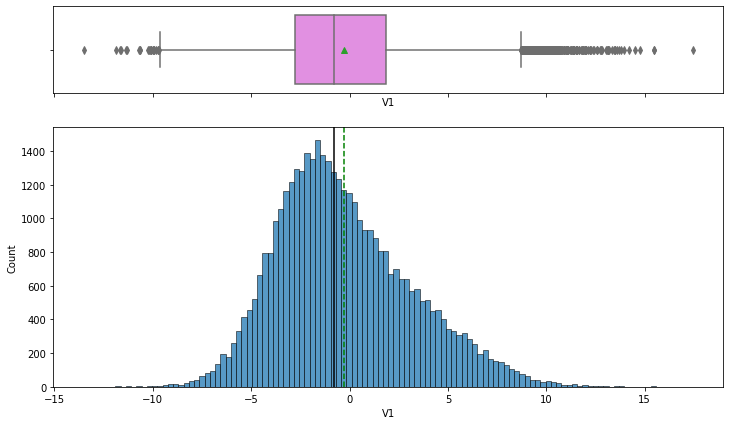

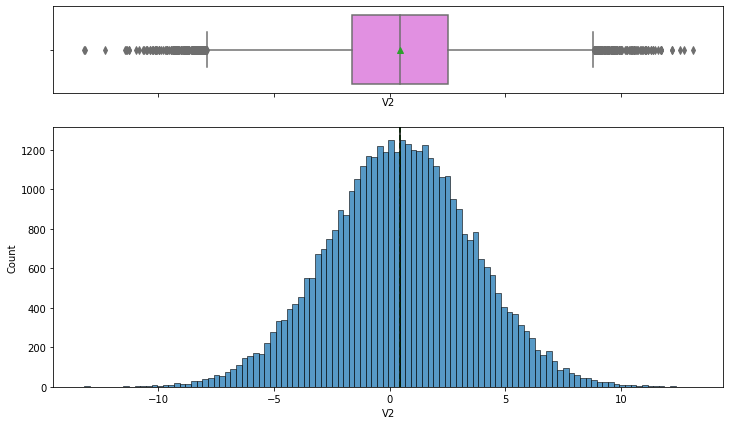

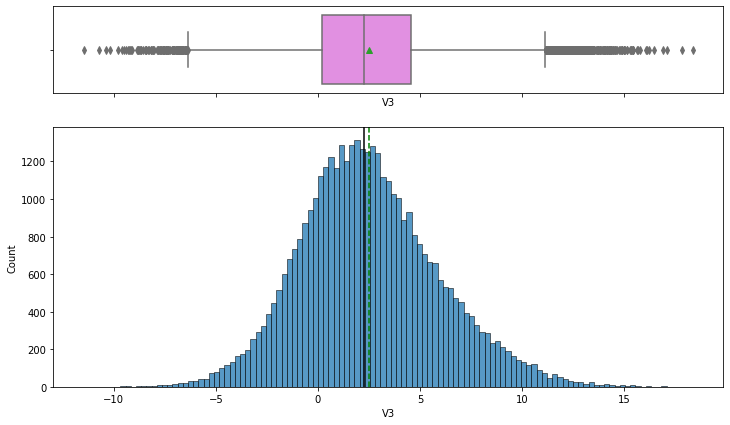

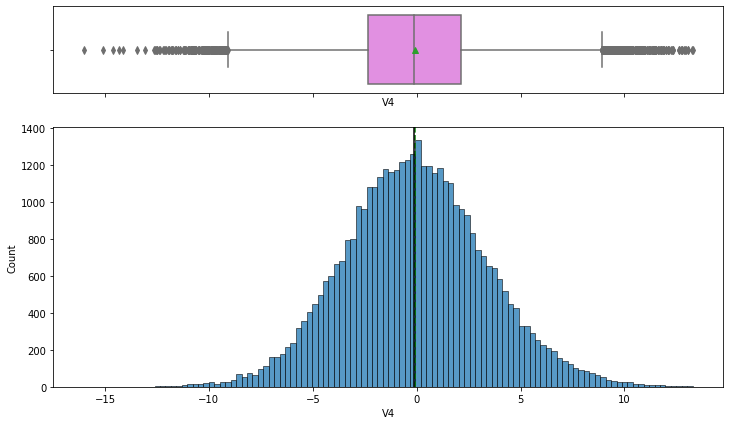

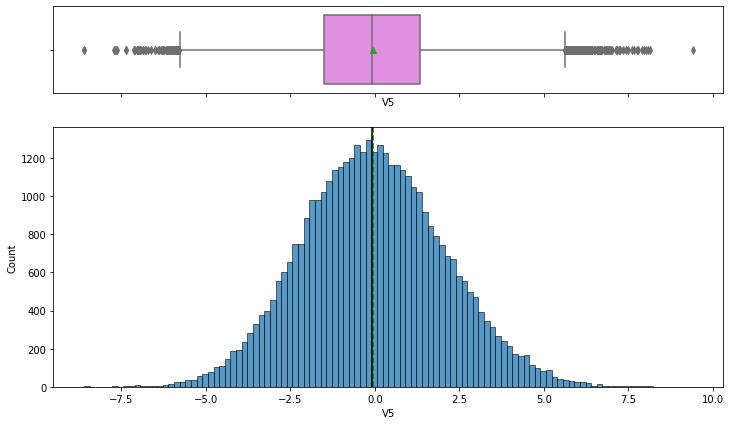

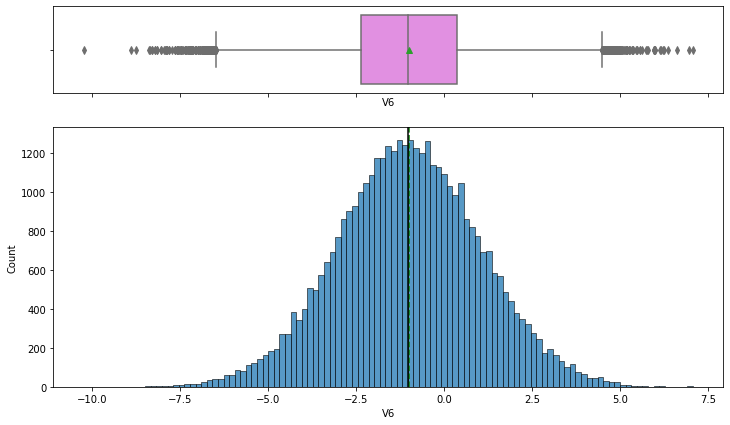

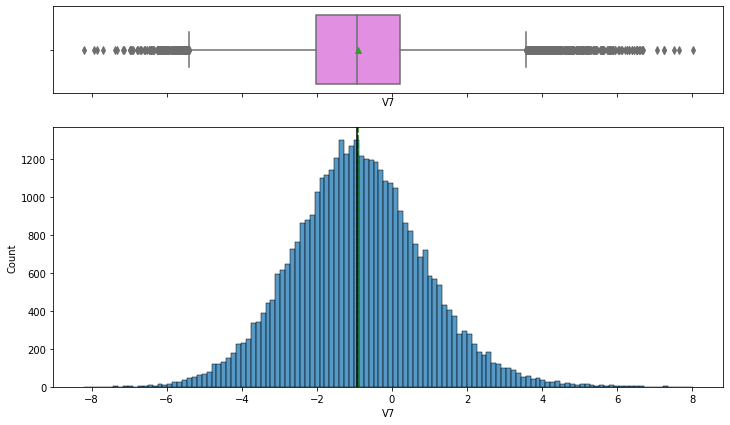

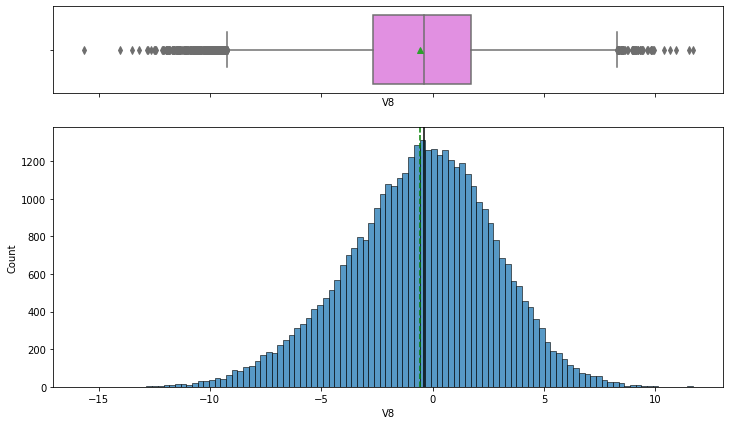

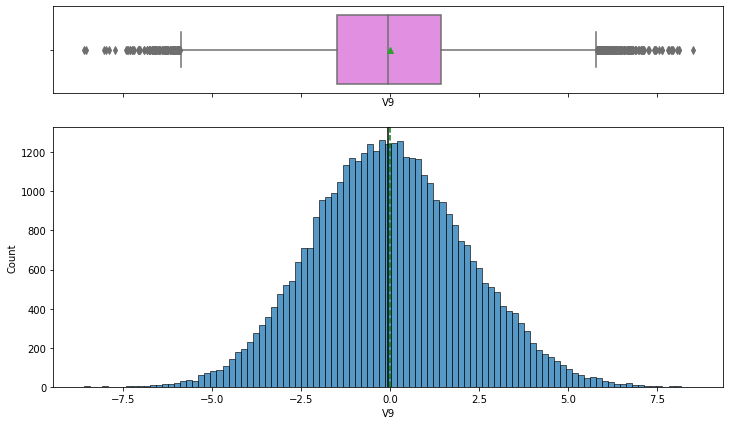

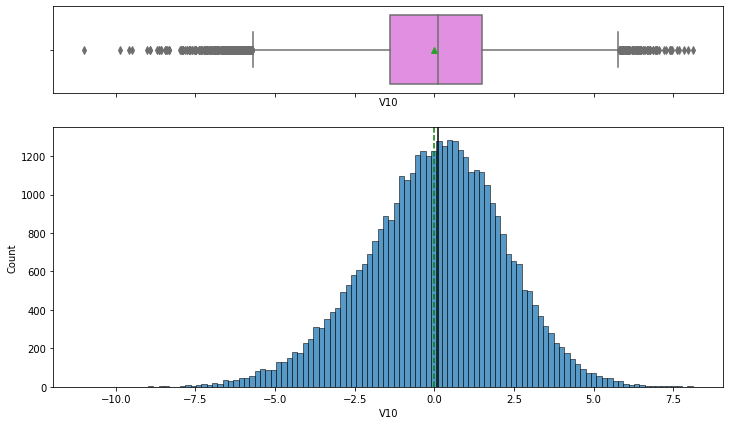

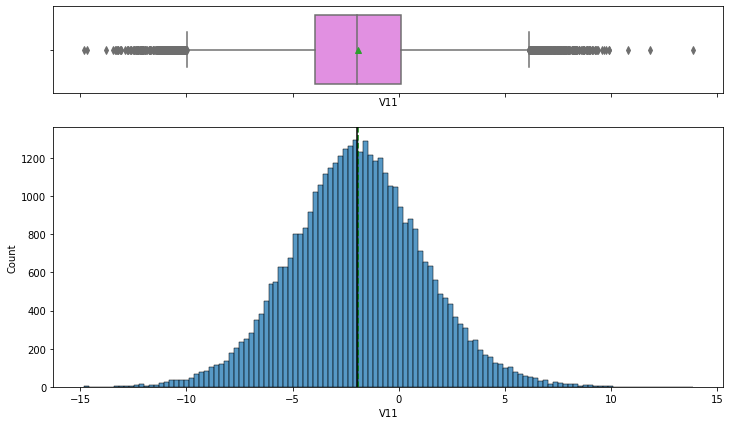

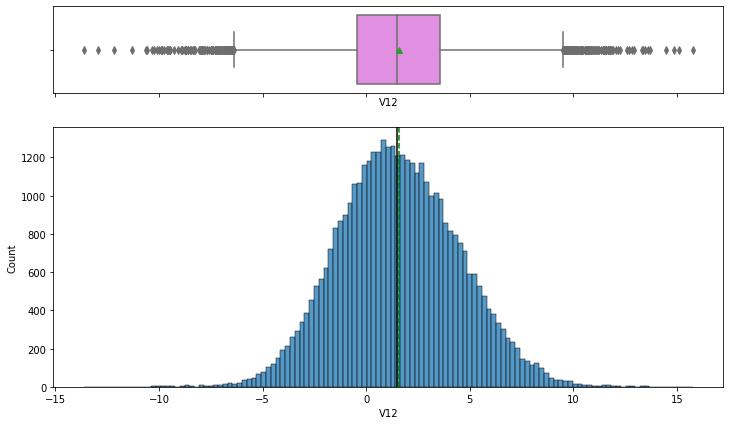

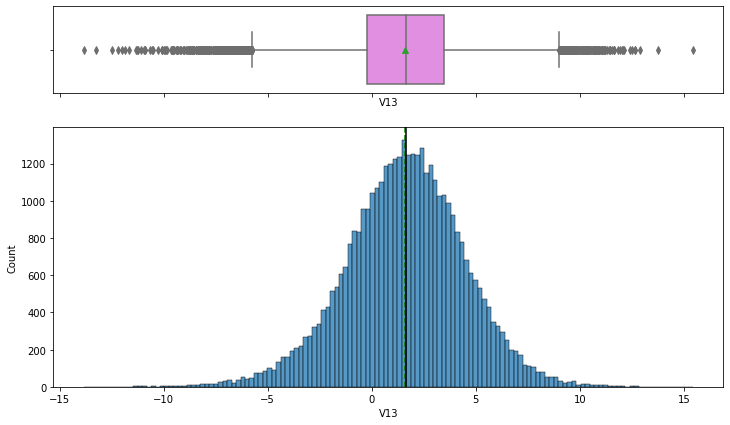

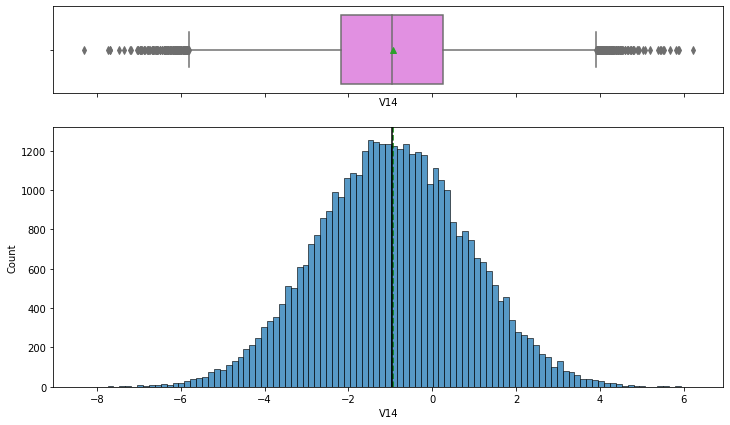

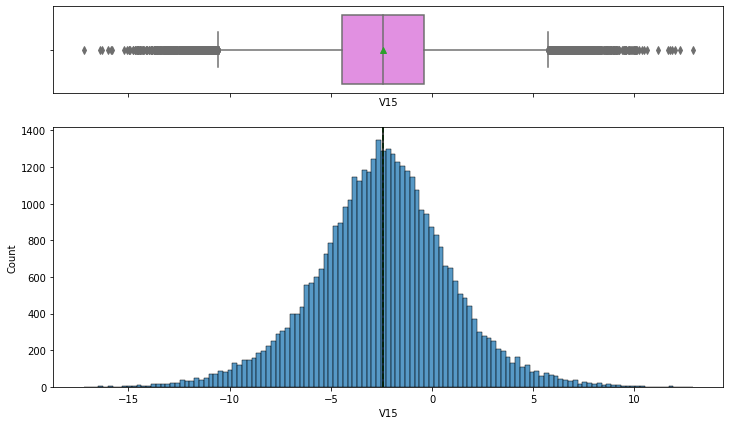

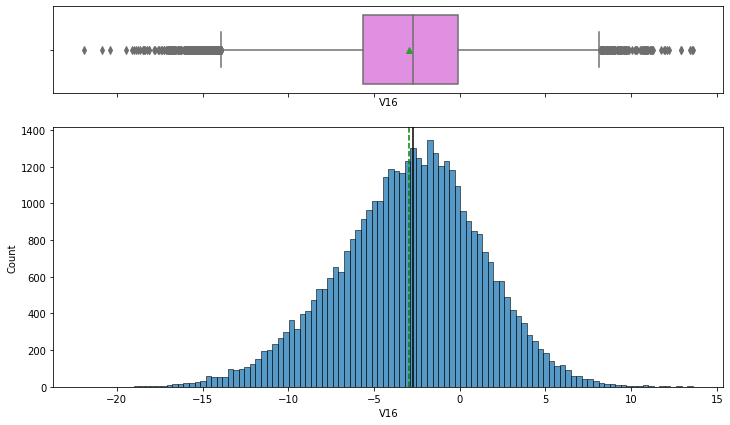

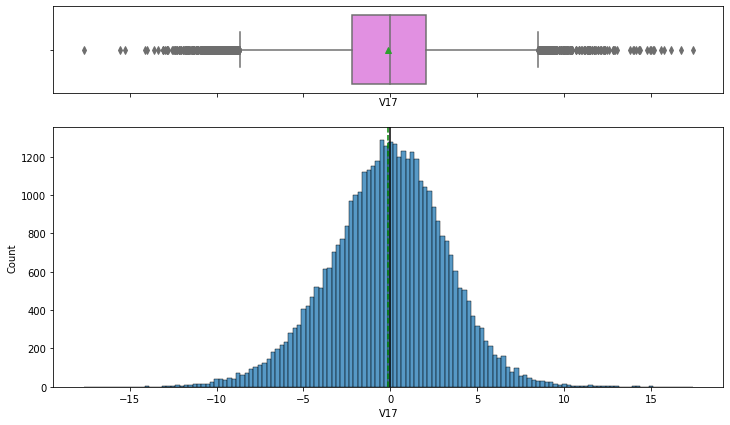

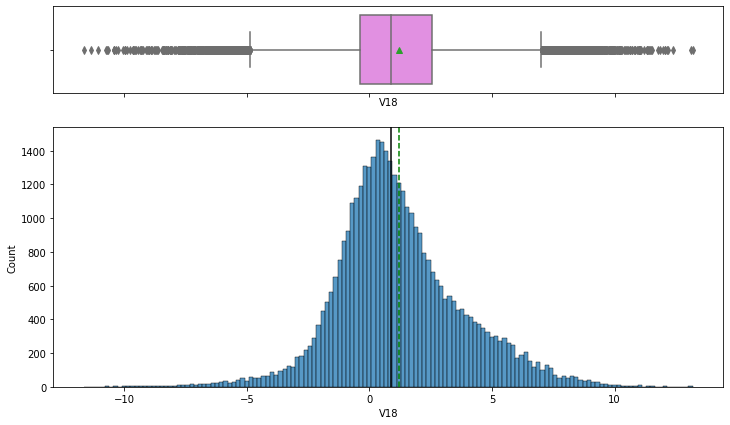

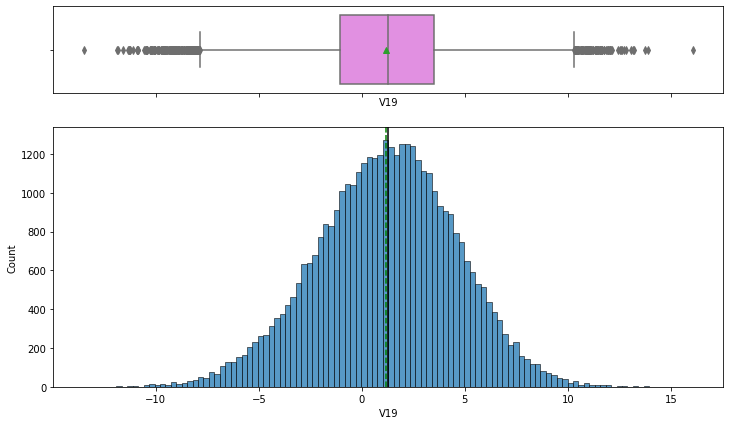

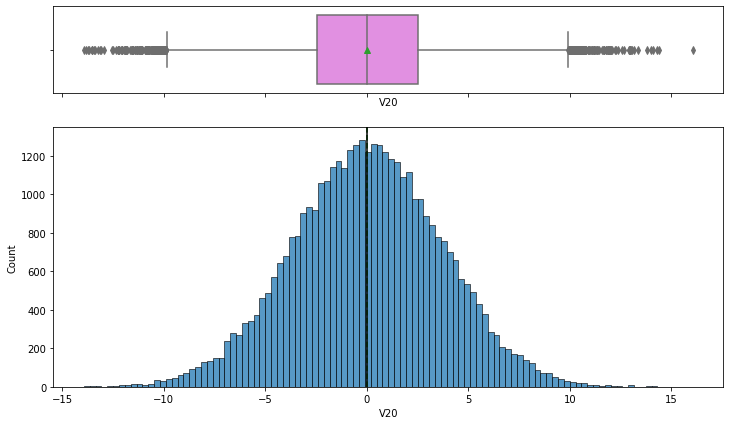

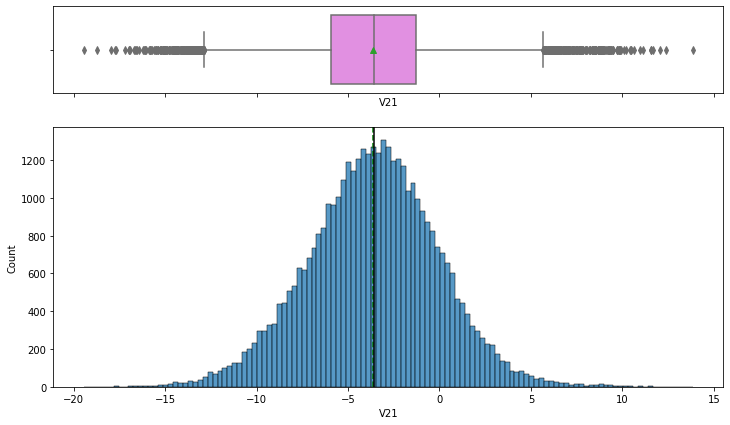

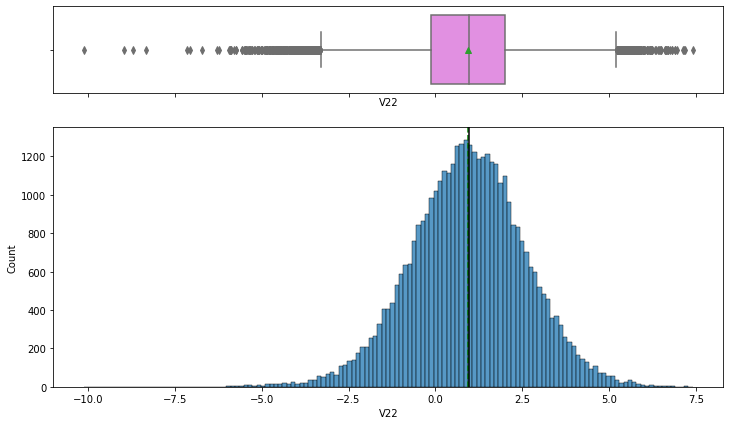

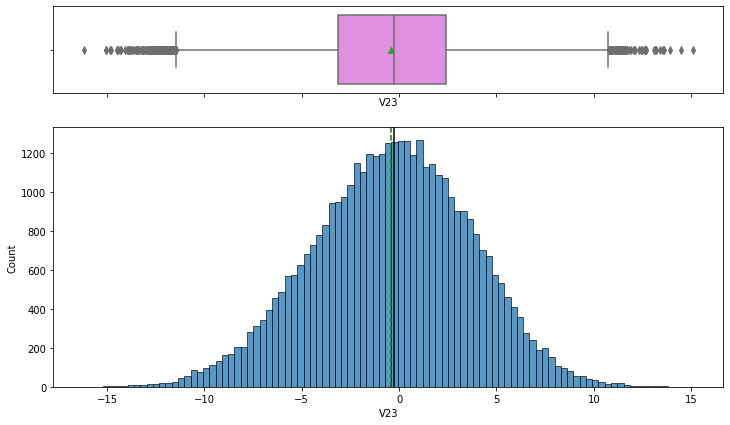

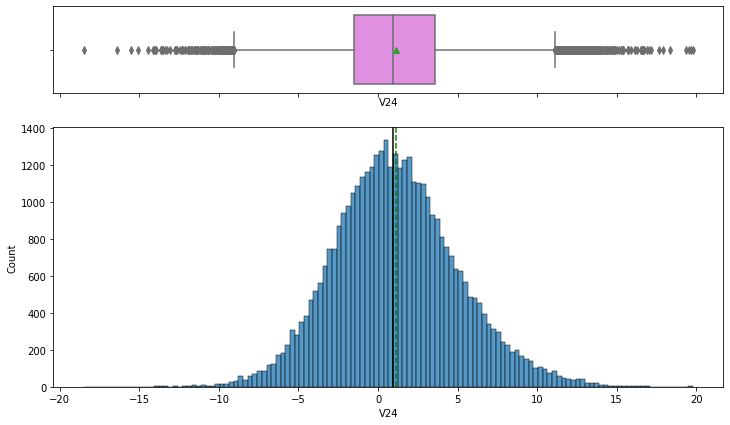

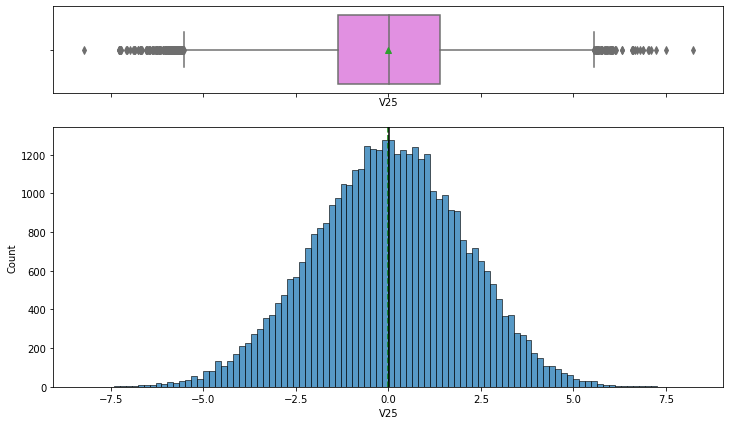

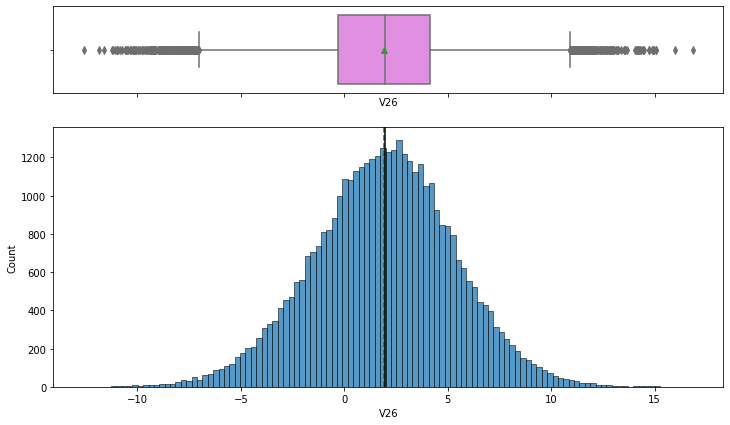

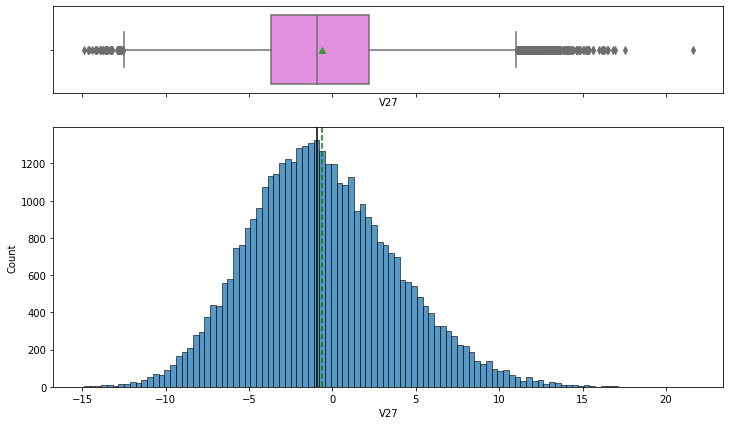

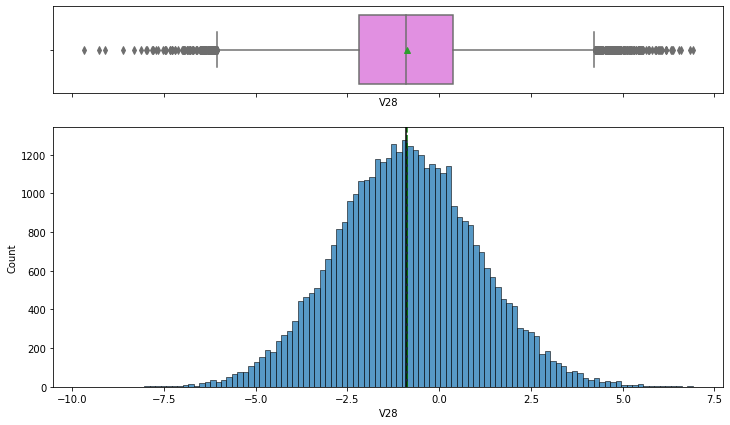

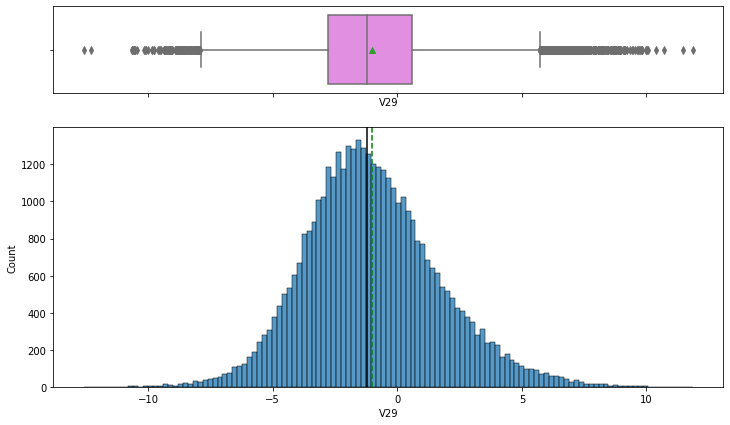

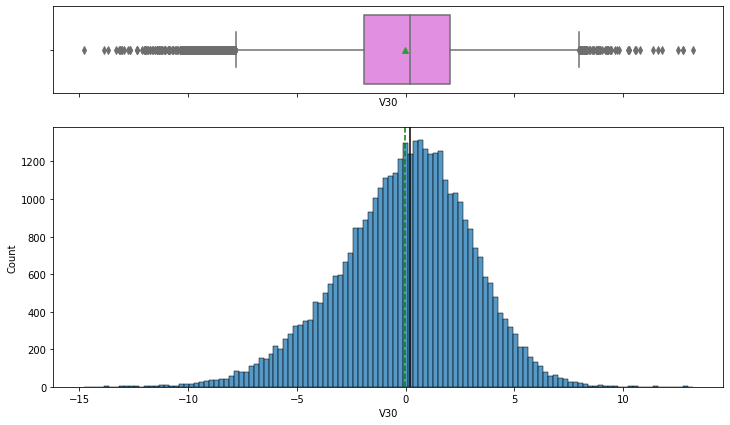

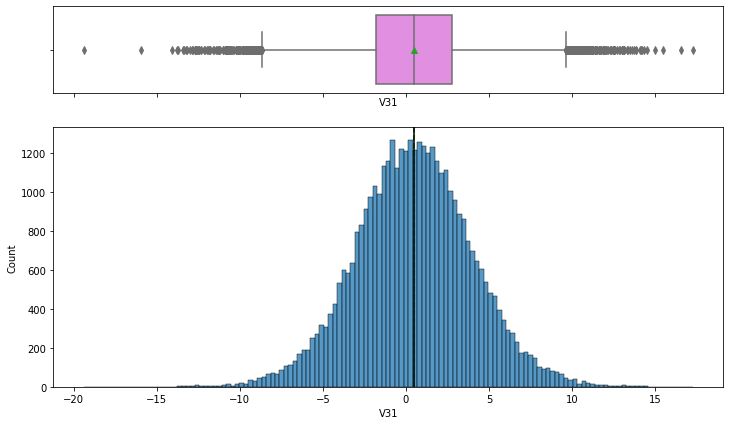

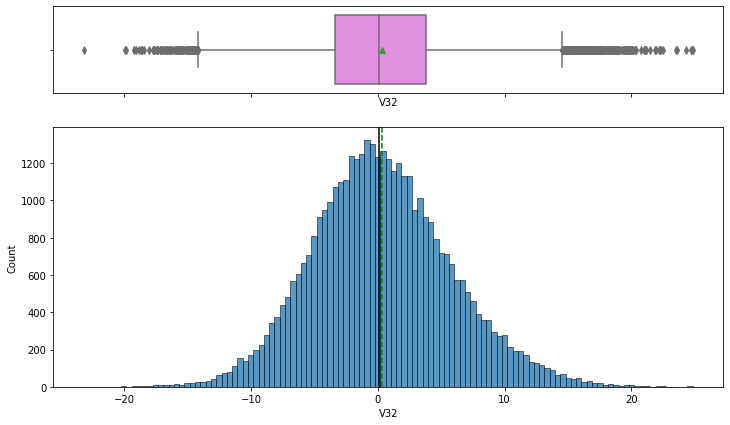

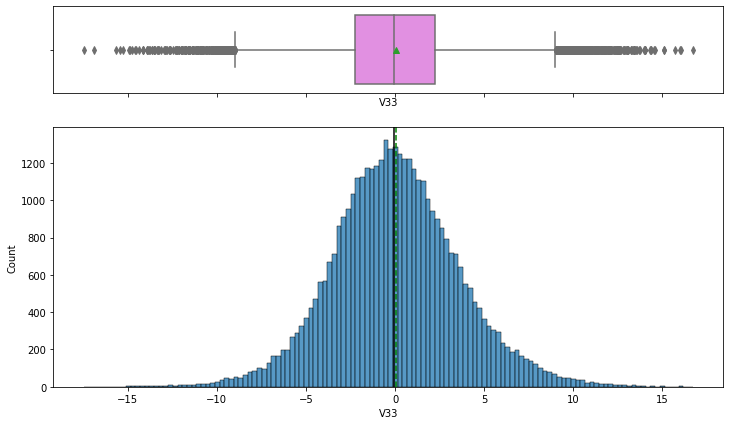

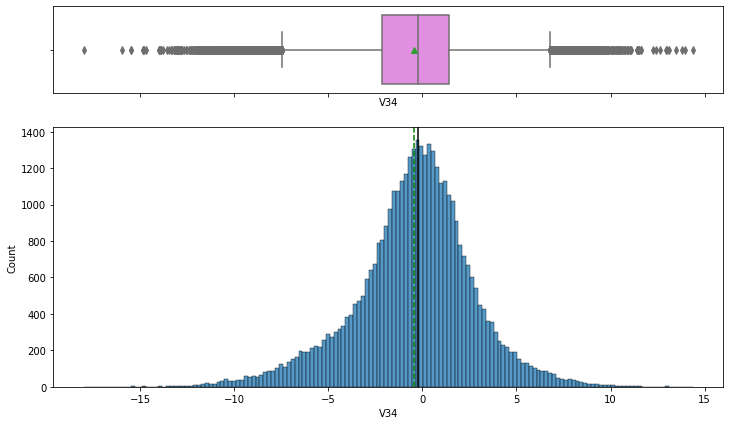

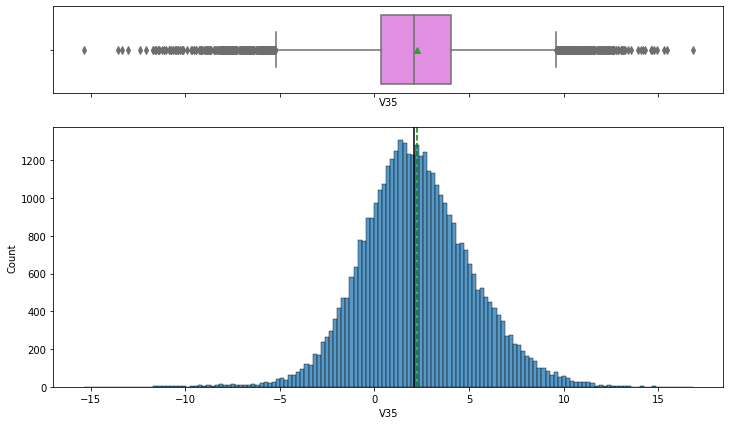

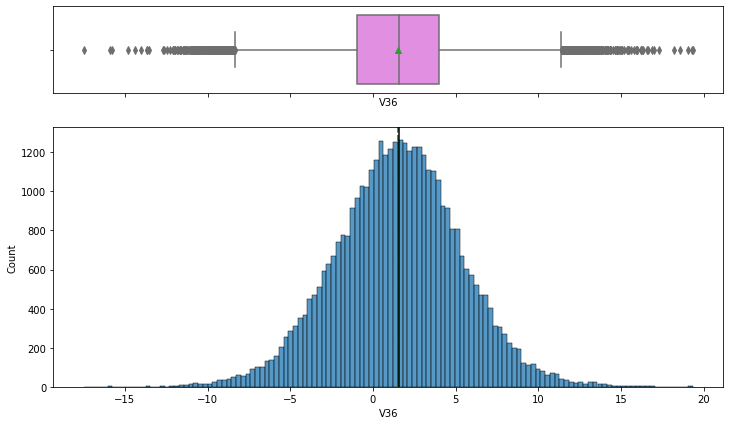

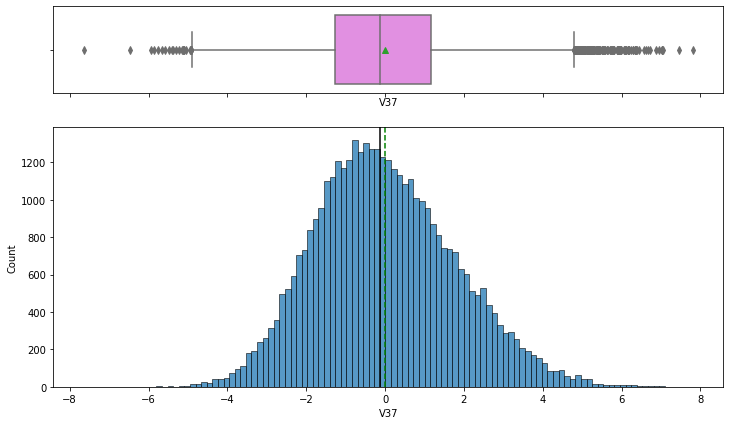

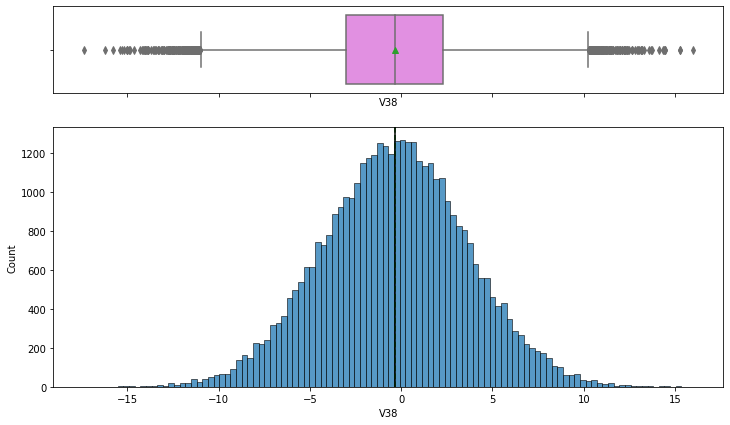

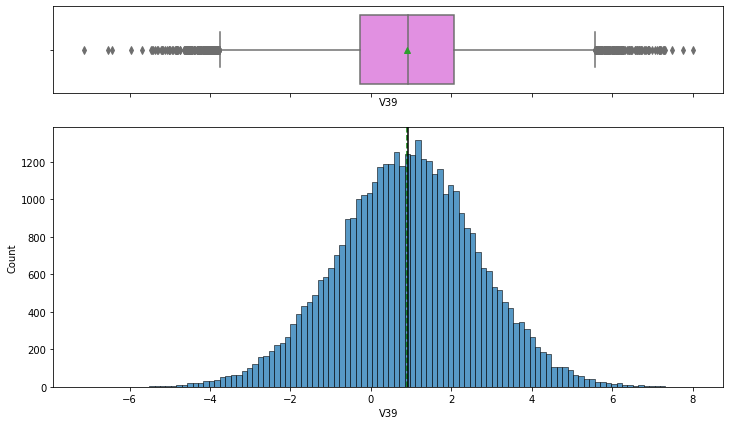

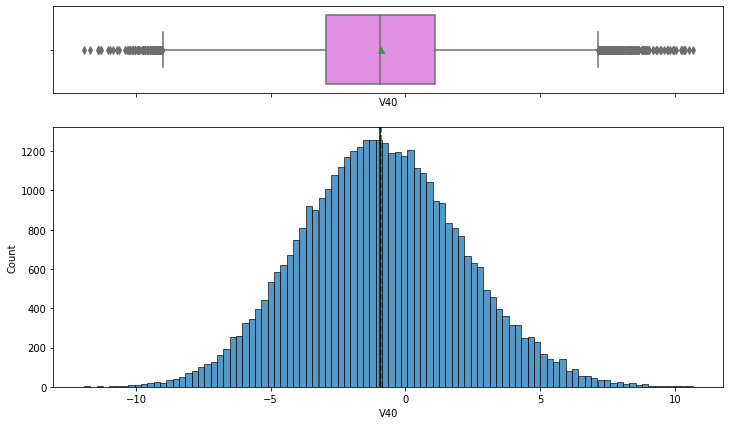

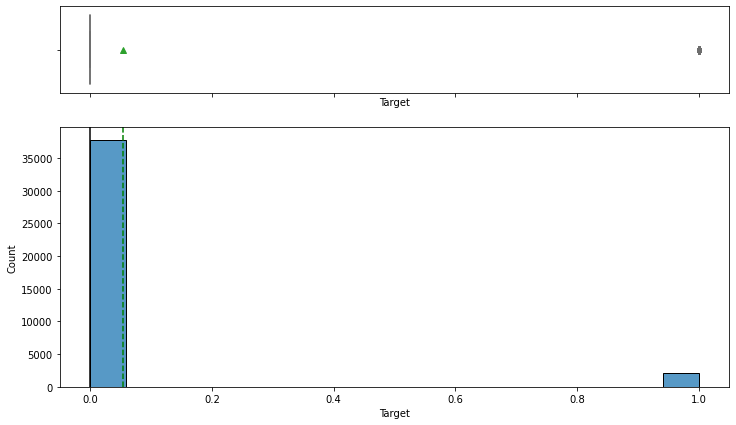

In [ ]:
for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None) 

#### Observations:
- Most of the independent variables are almost normally distibuted and have outliers at both ends.
- Few features are left skewed and have outliers at both end.
- Few features are right skewed and have outliers at both ends.
- Most of the rows in target variable belongs to class 0, which is non-failure.

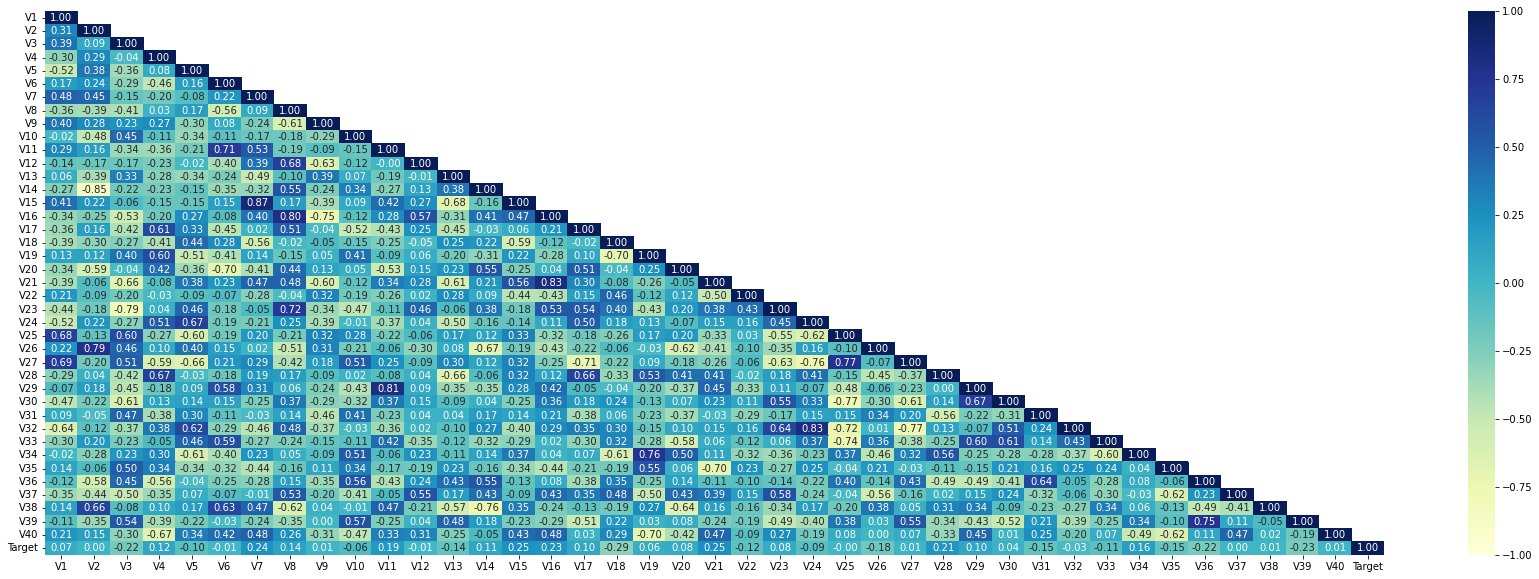

In [ ]:
# Let us look at heat map 
cols_list = df.columns.tolist()
corr=df[cols_list].corr()
matrix = np.triu(corr)

plt.figure(figsize=(30, 10))
np.fill_diagonal(matrix, False)
sns.heatmap(corr, annot=True,mask=matrix, vmin=-1, vmax=1, fmt=".2f", cmap="YlGnBu")
plt.show()

#### Observations:
- None of the independent variables are highly correlated to Target variable.
- There is correlation among few of the independent variables.


### Distribution of classes in Target variable

In [ ]:
# distribution of classes in training set
df["Target"].value_counts(1)

0   0.945
1   0.055
Name: Target, dtype: float64

In [ ]:
# distribution of classes in testing set
df_test["Target"].value_counts(1)

0   0.945
1   0.055
Name: Target, dtype: float64

#### Observations:
- 94.5% of values in target variables fall under class 0.
- Only 5.5% of values in target variables belong to class 1.
- Distribution of classes is same for both training and testing data.

## Data Pre-processing

In [ ]:
# defining the dependent and independent variables in training set
X = df.drop(["Target"], axis=1)
y = df["Target"]

# defining the dependent and independent variables in testing set
X_test = df_test.drop(["Target"], axis=1)
y_test = df_test["Target"]

In [ ]:
# Splitting data into training and validation set:

X_train, X_val, y_train, y_val = train_test_split(
    X, y,test_size=0.25, random_state=1, stratify=y) ## Complete the code to split the data into train test in the ratio 75:25

print(f'Shape of training set is {X_train.shape}\nShape of validation set is {X_val.shape}\nShape of test set is  {X_test.shape}')

Shape of training set is (30000, 40)
Shape of validation set is (10000, 40)
Shape of test set is  (10000, 40)


In [ ]:
# let us impute missing values with median values.
imputer = SimpleImputer(strategy="median")

In [ ]:
# imputing missing values in training  set
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# imputing missing values in the validation data
X_val =  pd.DataFrame(imputer.fit_transform(X_val), columns=X_val.columns)

# imputing missing values in the testing set
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)

In [ ]:
# Checking for missing values in training,validation and testing data after imputation
print(X_train.isna().any().sum())
print(X_val.isna().any().sum())
print(X_test.isna().any().sum())

0
0
0


There are no missing values in training, validation and test set now.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
            
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use **Recall** as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

**We are using following 6 models:**
- Decision Tree classifier
- Logistic Regression
- Random Forest Clasiifier
- Bagging Classifier
- Gradient Boosting Classifier
- XGB classifier

### Model Building with original data

In [ ]:
# list to store all the models
models = []  

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Random Forest",RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Gradient Boosting",GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost",XGBClassifier(random_state=1, eval_metric='logloss')))

# list to store all model's CV scores
results1 = [] 

# list to store name of the models
names = []  


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

dtree: 0.7335365853658538
Logistic regression: 0.48292682926829267
Random Forest: 0.7621951219512195
Bagging: 0.7347560975609755
Gradient Boosting: 0.7170731707317073
XGBoost: 0.748780487804878

Validation Performance:

dtree: 0.7477148080438757
Logistic regression: 0.4625228519195612
Random Forest: 0.7659963436928702
Bagging: 0.7349177330895795
Gradient Boosting: 0.7148080438756855
XGBoost: 0.7385740402193784


#### Observations:
- Random forest model is giving best mean cross validation cost followed by XGBoost, Bagging and Decision Tree.
- Rondom forest is giving good score on validation set, followed by Decision Trees.
- Training and validation score of all the models are comparable.


### Model Building with Oversampled data


In [ ]:
# Distribution of classes in target begore oversampling
print("Before oversampling")
print(y_train.value_counts(1))

Before oversampling
0   0.945
1   0.055
Name: Target, dtype: float64


In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
# Distribution of classes in target after oversampling
print("After oversampling")
print(y_train_over.value_counts(1))

After oversampling
0   0.500
1   0.500
Name: Target, dtype: float64


In [ ]:
# shape before oversampling data
print("Before oversampled data")
print(X_train.shape,y_train.shape)

Before oversampled data
(30000, 40) (30000,)


In [ ]:
# shape of oversampled data
print("Shape of Over sampled data")
print(X_train_over.shape,y_train_over.shape)

Shape of Over sampled data
(56720, 40) (56720,)


In [ ]:
def building_models(predictors,target):

        # list to store all the models
        models = []  

        # Appending models into the list
        models.append(("dtree", DecisionTreeClassifier(random_state=1)))
        models.append(("Logistic regression", LogisticRegression(random_state=1)))
        models.append(("Random Forest",RandomForestClassifier(random_state=1)))
        models.append(("Bagging", BaggingClassifier(random_state=1)))
        models.append(("Gradient Boosting",GradientBoostingClassifier(random_state=1)))
        models.append(("XGBoost",XGBClassifier(random_state=1, eval_metric='logloss')))

        # list to store all model's CV scores
        results1 = [] 

        # list to store name of the models
        names = []  


        # loop through all models to get the mean cross validated score
        print("\n" "Cross-Validation Cost:" "\n")

        for name, model in models:
            kfold = StratifiedKFold(
                n_splits=5, shuffle=True, random_state=1
            )  # Setting number of splits equal to 5
            cv_result = cross_val_score(
                estimator=model, X=predictors, y=target, scoring=scorer, cv=kfold
            )
            results1.append(cv_result)
            names.append(name)
            print("{}: {}".format(name, cv_result.mean()))

        print("\n" "Validation Performance:" "\n")

        for name, model in models:
            model.fit(predictors,target)
            scores = recall_score(y_val, model.predict(X_val))
            print("{}: {}".format(name, scores))

        return results1

In [ ]:
#building models on oversampled data
res_over_samp=building_models(X_train_over,y_train_over)


Cross-Validation Cost:

dtree: 0.9722143864598026
Logistic regression: 0.8754583921015515
Random Forest: 0.9817348377997179
Bagging: 0.9730606488011284
Gradient Boosting: 0.9148095909732017
XGBoost: 0.9101551480959097

Validation Performance:

dtree: 0.8135283363802559
Logistic regression: 0.8391224862888482
Random Forest: 0.8683729433272395
Bagging: 0.8354661791590493
Gradient Boosting: 0.8811700182815356
XGBoost: 0.8756855575868373


In [ ]:
print(res_over_samp)

[array([0.97425952, 0.97232017, 0.97196756, 0.97214386, 0.97038082]), array([0.88011283, 0.87834979, 0.86618477, 0.875     , 0.87764457]), array([0.98413258, 0.98148801, 0.97849083, 0.98078279, 0.98377997]), array([0.97637518, 0.9735543 , 0.96879408, 0.97232017, 0.97425952]), array([0.91854725, 0.91537377, 0.91061354, 0.91431594, 0.91519746]), array([0.91008463, 0.91237659, 0.90726375, 0.91114245, 0.90990832])]


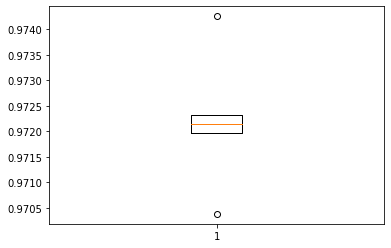

In [ ]:
plt.boxplot(res_over_samp[0])
plt.show()

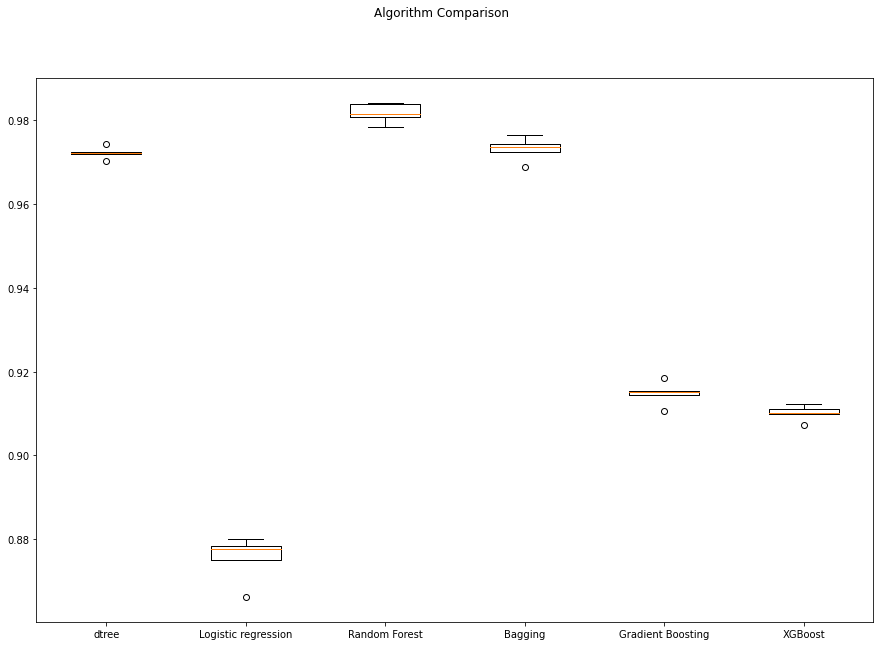

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 10))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(res_over_samp)
ax.set_xticklabels(names)

plt.show()

### Model Building with Undersampled data

In [ ]:
# Distribution of classes in target begore undersampling 
print("Before undersampling")
print(y_train.value_counts(1))

Before undersampling
0   0.945
1   0.055
Name: Target, dtype: float64


In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
# Distribution of classes in target after undersampling 
print("Before undersampling")
print(y_train_un.value_counts(1))

Before undersampling
0   0.500
1   0.500
Name: Target, dtype: float64


In [ ]:
# shape before undersampling data
print("Shape of data before under sampling")
print(X_train.shape,y_train.shape)

Shape of data before under sampling
(30000, 40) (30000,)


In [ ]:
# shape of undersampled data
print("Shape of under sampled data")
print(X_train_un.shape,y_train_un.shape)

Shape of under sampled data
(3280, 40) (3280,)


In [ ]:
#building models on undersampled data
building_models(X_train_un,y_train_un)


Cross-Validation Cost:

dtree: 0.8591463414634146
Logistic regression: 0.8554878048780488
Random Forest: 0.8981707317073171
Bagging: 0.875
Gradient Boosting: 0.8871951219512194
XGBoost: 0.8835365853658537

Validation Performance:

dtree: 0.7477148080438757
Logistic regression: 0.4625228519195612
Random Forest: 0.7659963436928702
Bagging: 0.7349177330895795
Gradient Boosting: 0.7148080438756855
XGBoost: 0.7385740402193784


In [ ]:
print(cv_result.mean())

0.748780487804878


## HyperparameterTuning 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

## Tuning Decision Tree 

### Tuning Decision tree with oversampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

## Tuning Logistic Regression model

### Tuning Logistic regression model with original data

### Tuning Logistic regression model with oversampled data

### Tuning Logistic regression model with undersampled data

## Tuning Random forest classifier with oversampled data

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
tuned_rf2 = RandomForestClassifier(
    max_features="sqrt",
    random_state=1,
    max_samples=0.5000000000000001,
    n_estimators=250,
    min_samples_leaf=1,
)

tuned_rf2.fit(X_train_over,y_tarin_over) 

In [ ]:
# tuned random forest model performanance on training set
rf2_train_perf =  model_performance_classification_sklearn(
    tuned_rf2, X_train_over, y_train_over
)
rf2_train_perf

In [ ]:
# tuned random forest model performance on validation set
rf2_val_perf =  model_performance_classification_sklearn(
    tuned_rf2, X_val, y_val
)
rf2_val_perf

## Tuning Bagging classifier with oversampled data

In [ ]:
 # defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
              'max_samples': [0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9],
              'n_estimators' : [30,50,70],
             }


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.'_______' ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
tuned_bag2 = BaggingClassifier(
    max_features=0.9, random_state=1, max_samples=0.9, n_estimators=50
)

tuned_bag2.fit(X_train_over,y_train_over) ## Complete the code to fit the model on over sampled data

## Tuning Gardient Boost classifier with oversampled data

In [ ]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features="sqrt",
    random_state=1,
    max_samples=0.5000000000000001,
    n_estimators=250,
    min_samples_leaf=1,
)

tuned_gbm.fit(X_train_over, y_train_over)

In [ ]:
# Tuned gradient boost classifier performance on training set
gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
)
gbm_train_perf

In [ ]:
# Tuned gradient boost classifier performance on validation set
gbm_val_perf = model_performance_classification_sklearn(
    tuned_gbm, X_val, y_val
)
gbm_val_perf

## Tuning XGB classifier with oversampled data

In [ ]:
# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=5,
    n_estimators=250,
    learning_rate=0.2,
    gamma=0,
)

xgb2.fit(X_train_over,y_train_over)

In [ ]:
# tuned XGB classifier performance on oversampled training data
xgb2_train_perf =   model_performance_classification_sklearn(
    xgb2, X_train_over, y_train_over
)
xgb2_train_perf

In [ ]:
# tuned XGB classifier performance on validation set
xgb2_val_perf =   model_performance_classification_sklearn(
    xgb2, X_val, y_val
)
xgb2_val__perf

## Model performance comparison and choosing the final model

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        rf2_train_perf.T,
        gbm_train_perf.T,
        xgb2_train_perf.T,
       
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random forest tuned with oversampled data",
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        rf2_val_perf.T,
        gbm_val_perf.T,
        xgb2_val_perf.T,
       
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Random forest tuned with oversampled data",
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    
]
print("Validation performance comparison:")
models_val_comp_df

#### Based on above performance we chose ** Model** as best model

### Test set final performance

In [ ]:
Model_test = model_performance_classification_sklearn(model, X_test, y_test)
Model_test

### Feature Importances

In [ ]:
feature_names = X_train.columns
importances =  feature_importances_ ## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Pipelines to build the final model


In [ ]:
Model=Pipeline(steps=[(
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=50,
                scale_pos_weight=10,
                subsample=0.8,
                learning_rate=0.01,
                gamma=0,
                eval_metric="logloss",
                reg_lambda=5,
                max_depth=1,
            ),
      
    ])

In [ ]:
# Separating target variable and other variables
X1 = data.drop(columns="Target")
Y1 = data["Target"]

# Separating target variable from test data
X_test1 = df_test.drop(columns="Target") 
y_test1 = df_test["Target"]


In [ ]:
# We can't oversample data without doing missing value treatment, so let's first treat the missing values in the train set
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)

# let's treat the missing values in the test set
X_test1 = imputer.fit_transform(X_test1) 

In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_over1, y_over1 = sm.fit_resample(X1, Y1)

In [ ]:
Model.'_______' ##  Complete the code to fit the Model obtained from above step

In [ ]:
Model.'_______' ##  Complete the code to make predictions on the test data using the productionized Modelfeature_importances_

# Business Insights and Conclusions

***